<a href="https://colab.research.google.com/github/licciard/lu-phys3466/blob/main/quiz_4_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is based on Question 2 from the Final Exam - Winter 2018**


"A very long and narrow pipe is filled with water. At time $t=0$, a quantity of salt (of density $\rho_s$) is introduced into the pipe at some point $x_0$ (remote from both ends of the pipe). We wish to find the concentration of salt at any later time."

In principle, we can idealize this physical problem by assuming an infinitely long pipe. However, in this notebook we want to visualize a  numerical solution for the problem and so we have to limit the boundaries at some point. In this notebook we explore this fact to solve the problem using two different approaches: Fourier series and Fourier transform.

"Since the pipe is narrow, the variations of concentration of salt over a cross section of the pipe may be neglected and the concentration can be treated as a function of two variables only, $x$ and $t$. The evolution of the density $\rho(x,t)$ at any point $x$ is given by the one-dimensional diffusion equation:
$$\frac{\partial \rho}{\partial t} = D \frac{\partial^2 \rho}{\partial x^2}\;,$$ 
where $D$ is a diffusion coefficient of the salt."

The initial condition of this problem is given by $\rho(x,0) = \rho_0(x)$, where we take $$\rho_0(x) = \frac{100~\text{g}}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-x_0)^2}{2\sigma}}\;.$$ 
We consider the salt is completely dissolved at the boundaries
$$\rho(x_\pm,t) = 0$$
where $x_\pm$ are the boundaries: $x_{-} =0$ and $x_{+} = L$. In the limit,
these conditions may be formulate by the statement
$$\lim_{x_\pm \rightarrow \pm \infty} \rho(x,t) = 0\;. $$

In [ ]:
# Python modules used in this notebook
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ipywidgets import interact, IntSlider

We will re-use the functions introduced in the first notebook to solve the Heat Equation. 

The PDE solver utilizes a method that fails if the following condition is not satisfied: $$ D \frac{\Delta t}{(\Delta x)^2} \simeq 1\;.$$

*   The infinitely long pipe is taken at $L = 100$ m, with the salt initially placed at $x_0 = 50$ m and width $\sigma = 4$ m.
*   The diffusion coefficient set to $D = 0.5$ m$^{2}$/s.
*   We will consider solutions up to $t = 100$ s, after the boundary condition starts to fail.


In [ ]:
Dcoef = 0.5 # m^2/s
xlength = 100 # m
x0 = xlength / 2
width = 4 # m
tmax = 100 # sec
nsteps_time = 10001 
nsteps_x = 101 

time_step = tmax//nsteps_time

**Question 1. Adjust the code below to draw a Gaussian centered at $x_0$ and $\sigma$.**

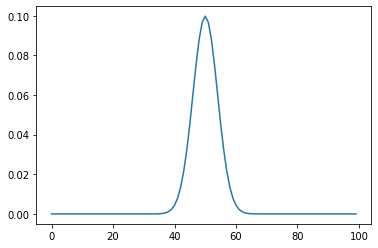

In [ ]:
mean = x0 # in m
standard_deviation = width # in m

x_values = np.arange(0, 100, 1)
init_gauss = scipy.stats.norm(mean, standard_deviation)
plt.plot(x_values, init_gauss.pdf(x_values))

**Question 2. Fill the boundary conditions and initial conditions for this problem.**

In [ ]:
# PDE solver for the 1D Heat Equation

def diffusion_equation(Dcoef, xmax, tmax, nt, nx):
   """
   Returns the salt density and corresponding x positions for 1D diffusion
   """
   # Increments
   dt = tmax/(nt-1)
   dx = xmax/(nx-1)

   # Initialise data structures

   temp = np.zeros((nx,nt))
   x = np.zeros(nx)

   # *** Fill the boundary conditions *** 
   temp[0,:] = 0 # <-- at x = 0
   temp[nx-1,:] = 0 # <-- at X = L

   # *** Fill the initial conditions ***
   for i in range(nx):
      temp[i,0] = init_gauss.pdf(i)*100 #25 #  <-- constant temperature at t = 0 for all x 

   # Loop
   for n in range(nt-1):
      for i in range(1,nx-1):
         temp[i,n+1] = temp[i,n] + Dcoef*(dt/dx**2.0)*(temp[i+1,n]-2.0*temp[i,n]+temp[i-1,n])

   # X Loop
   for i in range(nx):
      x[i] = i*dx

   return temp, x

**Question 3. Run the PDE solver and plot the solution. Visualize the time evolution. Does it make sense for you? Explain why.**

In [ ]:
density,xpos = diffusion_equation(Dcoef,xlength,tmax,nsteps_time,nsteps_x)

In [ ]:
def plot_temperature(t):
  plt.figure(figsize=(10,5))
  plt.plot(xpos,density[:,t*nsteps_time//tmax],c='b')
  plt.xlabel('x (m)'); plt.ylabel('Density (g/m)');
  plt.ylim([0,12.5])
  plt.show()

interact(plot_temperature,t = IntSlider(min=0, max=tmax-1, step=1, value=0, description='time (sec): '));

interactive(children=(IntSlider(value=0, description='time (sec): ', max=99), Output()), _dom_classes=('widget…

**Question 4. Use the Fourier transform to solve the problem, by hand - not using FFT. *(Refer to the Test Collection for similar problems.)* The solution is the convolution of two Gaussians.**

You should already know what is the result in this case. What is standard deviation of the convolution of two Gaussians with variances: $\sigma^2$ and $2 D t$? Use the result in the function below and compare the numerical solution with the Fourier transform.

In [ ]:
# Fourier transform
def fourier_transform_solution(t,x):
  sol_gauss = scipy.stats.norm(x0, np.sqrt(width**2+(2*Dcoef*t)))
  return sol_gauss.pdf(x)*100

In [ ]:
def plot_transform(t):
  plt.figure(figsize=(10,5))
  plt.plot(xpos,density[:,t*nsteps_time//tmax],'b-')
  plt.plot(xpos,fourier_transform_solution(t,xpos),'g.')
  plt.xlabel('x (m)'); plt.ylabel('Density (g/m)');
  plt.ylim([0,12.5])
  plt.show()

interact(plot_transform,t = IntSlider(min=0, max=tmax-1, step=1, value=0, description='time (sec): '));

interactive(children=(IntSlider(value=0, description='time (sec): ', max=99), Output()), _dom_classes=('widget…

We want to compare these solutions to one obtained using Fourier series since the domain is actually bounded at $x=0$ and $x=100$ m. 


**Question 5. Following in a similar manner to the Heat Equation, find the Fourier coefficients for a truncated Gaussian.**

Hint: There is a math tricky to simplify your work that will avoid all your integral calculations. Calculate both $a_n$ and $b_n$ simultaneously by taking the real and imaginary parts of $e^{i n \pi x /L}$. For the integral that needs to be performed:
$$a_n - i b_n = \int_{x_- = 0}^{x_+ = L} \rho_0(x) e^{- i \omega x} dx$$
assume $L$ is very very long $\Rightarrow x_- \rightarrow -\infty$ and $x_+ \rightarrow +\infty$. This way we you find a Fourier transform of a Gaussian, where $\omega = n \pi/L$, which you already know the answer as well. Simply substitute the value of $\omega$ in terms of $n$ and find the Fourier coefficients. 

**Fill the solution below with the correct Fourier coefficients and compare the solutions for different times and values of $N$, the number of terms in the Fourier series.**

In [ ]:
# Fourier series solution for T(t,x) with n terms in the series
def fourier_solution(t,x,n_terms):
  a_0 = 1 
  dens = a_0/2 
  for n in range(1,n_terms+1):
    a_n = np.cos(n*np.pi/2)*np.exp(-0.5*(n*np.pi/25)**2)
    b_n = np.sin(n*np.pi/2)*np.exp(-0.5*(n*np.pi/25)**2)
    dens += (a_n * np.cos(n*np.pi*x/xlength) + b_n * np.sin(n*np.pi*x/xlength))*np.exp(-Dcoef * (n*np.pi/xlength)**2 * t)
  return dens


In [ ]:
def plot_comparison(t,nterms):
  plt.figure(figsize=(10,5))
  plt.plot(xpos,density[:,t*nsteps_time//tmax],'b-')
  plt.plot(xpos,fourier_solution(t,xpos,nterms),'r')
  plt.plot(xpos,fourier_transform_solution(t,xpos),'g.')
  plt.xlabel('x (m)'); plt.ylabel('Density (g/m)');
  plt.ylim([0,12.5])
  plt.show()  

interact(plot_comparison,
         t = IntSlider(min=0, max=tmax-1, step=1, value=0, description='time (sec): '),
         nterms = IntSlider(min=1, max=30, step=1, value=1, description='N terms: '));

interactive(children=(IntSlider(value=0, description='time (sec): ', max=99), IntSlider(value=1, description='…

**Question 6. Based on the comparison above, is there a time where only one term in the Fourier series is sufficient to describe the solution? At $t=99$ s, what is the minimum number of terms $N$ that approximates the solution reasonably well?** 